## Data Dictionary
- Airline: The name of the airline company.
- Date_of_Journey: The date of the journey.
- Source: The source location from where the flight departs.
- Destination: The destination location where the flight arrives.
- Route: The flight route or the path of the journey.
- Dep_Time: The departure time of the flight.
- Arrival_Time: The arrival time of the flight.
- Duration: The duration of the flight.
- Total_Stops: The total number of stops during the flight.
- Additional_Info: Additional information about the flight.
- Price: The price of the flight ticket.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Loading dataset

In [2]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Handling missing values
- The number of null values is less than 5% of data size. So, let's eliminate the null values now.
- Moreover, dropping the duplicate values

In [8]:
data.duplicated().sum()

220

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.dropna(inplace = True)

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory data analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [15]:
# Function to extract time from the arrival time string
def extract_time(arrival_time):
    return arrival_time.split()[0]

# Apply the extraction function to the Arrival_Time column
data['Clean_Arrival_Time'] = pd.to_datetime(data['Arrival_Time'].apply(extract_time), format='%H:%M').dt.time

# Convert Dep_Time to time format
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.time

In [16]:
# Extract hours and minutes from Dep_Time and Clean_Arrival_Time

data['Dep_Hour'] = pd.to_datetime(data['Dep_Time'].astype(str), format='%H:%M:%S').dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time'].astype(str), format='%H:%M:%S').dt.minute

data['Arrival_Hour'] = pd.to_datetime(data['Clean_Arrival_Time'].astype(str), format='%H:%M:%S').dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Clean_Arrival_Time'].astype(str), format='%H:%M:%S').dt.minute

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Clean_Arrival_Time,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,01:10:00,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,13:15:00,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,04:25:00,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,23:30:00,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,21:35:00,16,50,21,35


In [18]:
# Convert Date_of_Journey to datetime format
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

In [19]:
# Generate Day and Month columns
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month

# Display the DataFrame with the new columns
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Clean_Arrival_Time,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,01:10:00,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,13:15:00,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,04:25:00,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,23:30:00,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,21:35:00,16,50,21,35,1,3


In [20]:
# Function to convert duration to minutes
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

# Apply the conversion function to the Duration column
data['Duration_in_Minutes'] = data['Duration'].apply(duration_to_minutes)

# Display the DataFrame with the new column
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Clean_Arrival_Time,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day,Month,Duration_in_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,01:10:00,22,20,1,10,24,3,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,13:15:00,5,50,13,15,1,5,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,04:25:00,9,25,4,25,9,6,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,23:30:00,18,5,23,30,12,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,21:35:00,16,50,21,35,1,3,285


In [21]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [22]:
# Replacing textual representations of the number of stops with numerical representations:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [23]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [24]:
# Verify column names in the DataFrame
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Clean_Arrival_Time', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Day', 'Month',
       'Duration_in_Minutes'],
      dtype='object')

In [25]:
data.drop(columns = ['Date_of_Journey', 'Route', 'Additional_Info', 'Arrival_Time', 'Duration', 'Dep_Time', 'Clean_Arrival_Time'], inplace = True)

- Date_of_Journey:
We can  drop journey date column as we have already extracted the relevant information into new columns(Day and Month). Also, we did not take the year column as it had only one value, i.e. 2019.

- Route:
The route column provides a detailed path of the flight, including the layovers, but this information is already implied by the combination of the Source, Destination, and Total_Stops columns.
For example, if a flight's source is Banglore, destination is New Delhi, and it has 1 stop, the route will be something like BLR → [intermediate stop] → DEL. The exact intermediate stop is not always necessary for many analyses, especially if we're primarily concerned with overall travel characteristics like total duration, number of stops, and price.

- Additional_Info:
Since the majority of entries contain "No info," the presence of this column does not add substantial value to the dataset.
Removing the Additional_Info column simplifies the dataset, making it easier to work with and analyze.

- Arrival_Time:
We drop the original 'Arrival_Time' column as it contains mixed data, including both time and month information. This inconsistency can lead to misinterpretation and incorrect analysis.

- Duration:
After converting Duration into minutes (Duration_in_Minutes), keeping the original Duration column becomes redundant as all necessary information is now captured in the Duration_in_Minutes column.

- Dep_Time & Clean_Arrival_Time:
We can drop the Dep_Time and Clean_Arrival_Time columns as we have already extracted the relevant information into new columns (Dep_Hour, Dep_Minute, Arrival_Hour, and Arrival_Minute). 


In [26]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Day,Month,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,24,3,170
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,1,5,445
2,Jet Airways,Delhi,Cochin,2,13882,9,25,4,25,9,6,1140
3,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,12,5,325
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,1,3,285


In [27]:
# Reorder the columns
columns = ['Airline', 'Day', 'Month', 'Source', 'Destination', 'Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_in_Minutes', 'Price']

data = data[columns]

# Display the DataFrame with reordered columns
data.head()

,Airline,Day,Month,Source,Destination,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_in_Minutes,Price
0,IndiGo,24,3,Banglore,New Delhi,0,22,20,1,10,170,3897
1,Air India,1,5,Kolkata,Banglore,2,5,50,13,15,445,7662
2,Jet Airways,9,6,Delhi,Cochin,2,9,25,4,25,1140,13882
3,IndiGo,12,5,Kolkata,Banglore,1,18,5,23,30,325,6218
4,IndiGo,1,3,Banglore,New Delhi,1,16,50,21,35,285,13302


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10462 non-null  object
 1   Day                  10462 non-null  int32 
 2   Month                10462 non-null  int32 
 3   Source               10462 non-null  object
 4   Destination          10462 non-null  object
 5   Total_Stops          10462 non-null  int64 
 6   Dep_Hour             10462 non-null  int32 
 7   Dep_Minute           10462 non-null  int32 
 8   Arrival_Hour         10462 non-null  int32 
 9   Arrival_Minute       10462 non-null  int32 
 10  Duration_in_Minutes  10462 non-null  int64 
 11  Price                10462 non-null  int64 
dtypes: int32(6), int64(3), object(3)
memory usage: 817.3+ KB


# Visualizations

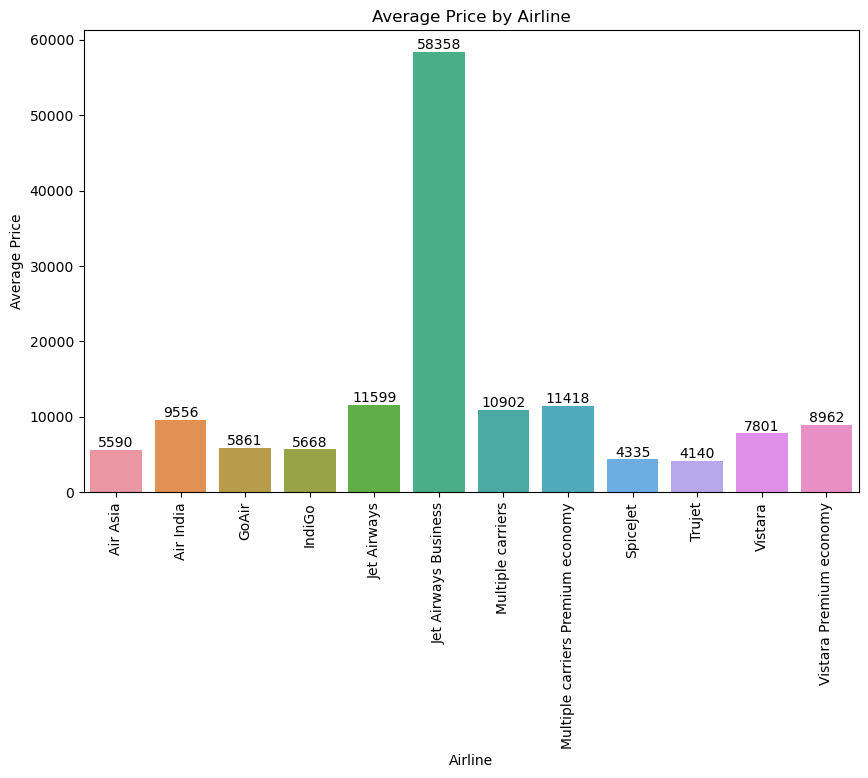

In [29]:
#Average Price by Airline
avg_price_by_airline = data.groupby('Airline')['Price'].mean().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Airline', y='Price', data=avg_price_by_airline)

# Adding counts directly on the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
            ha='center', va='bottom', color='black', fontsize=10)
    
plt.title('Average Price by Airline')
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()


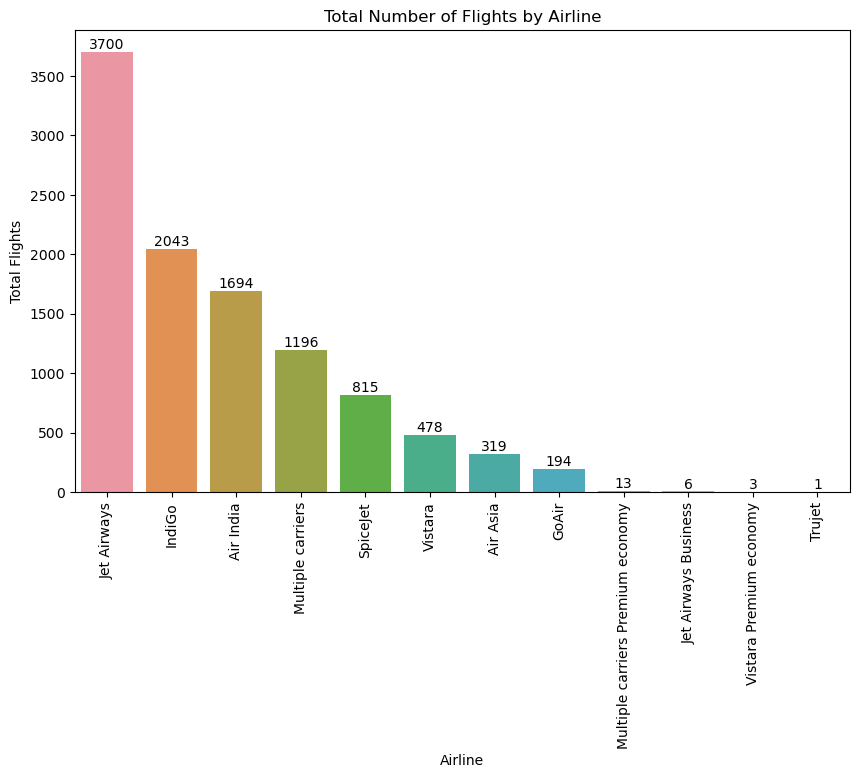

In [30]:
#Total Number of Flights by Airline
flights_by_airline = data['Airline'].value_counts().reset_index()
flights_by_airline.columns = ['Airline', 'Total Flights']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Airline', y='Total Flights', data=flights_by_airline)

# Adding counts directly on the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
            ha='center', va='bottom', color='black', fontsize=10)

plt.title('Total Number of Flights by Airline')
plt.ylabel('Total Flights')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()


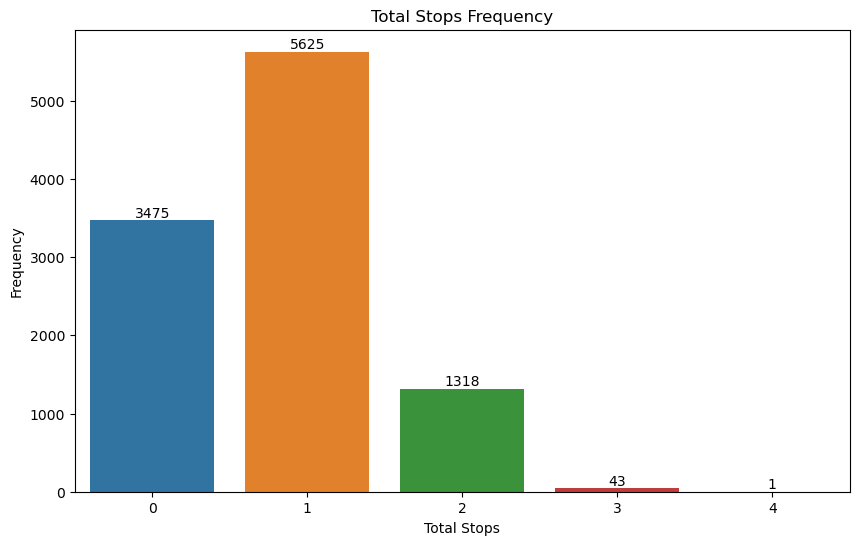

In [31]:
#Total Stops Frequency
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Total_Stops', data=data)

# Adding counts directly on the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()),
            ha='center', va='bottom', color='black', fontsize=10)
    
plt.title('Total Stops Frequency')
plt.ylabel('Frequency')
plt.xlabel('Total Stops')
plt.show()


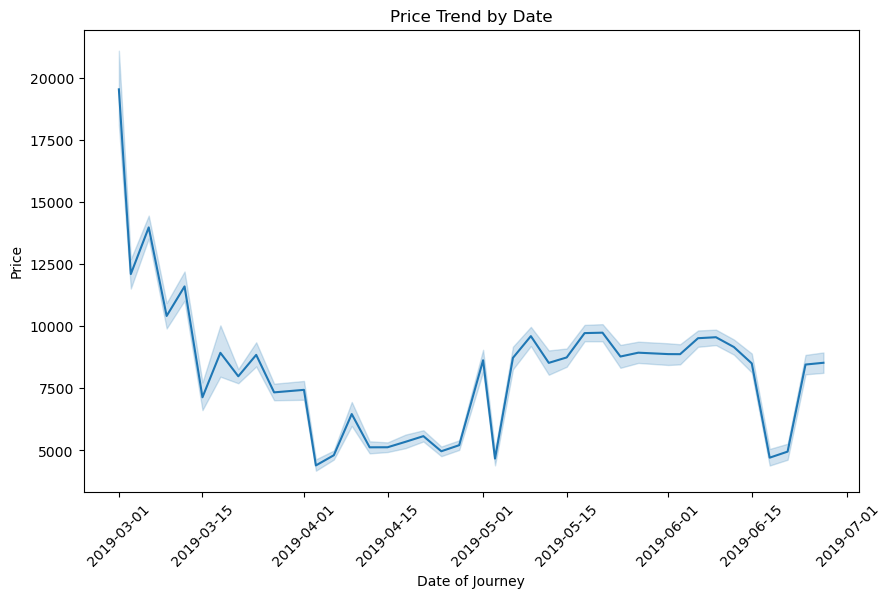

In [32]:
data['Date_of_Journey'] = pd.to_datetime(data[['Day', 'Month']].assign(Year=2019))
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=data)
plt.title('Price Trend by Date')
plt.ylabel('Price')
plt.xlabel('Date of Journey')
plt.xticks(rotation = 45)
plt.show()



In [40]:
data['Month'].value_counts()

Month
5    3395
6    3311
3    2678
4    1078
Name: count, dtype: int64

In [33]:
data.drop(columns = ['Date_of_Journey'], inplace = True)

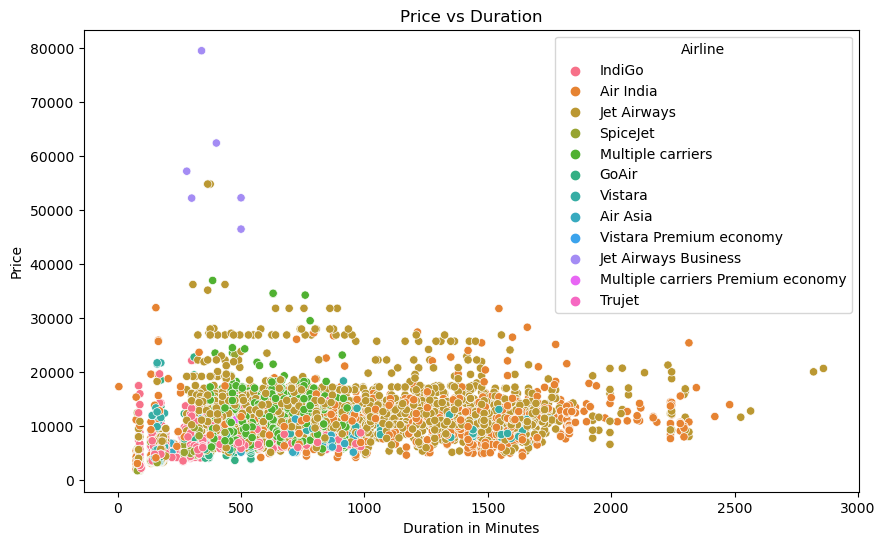

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_in_Minutes', y='Price', hue='Airline', data=data)
plt.title('Price vs Duration')
plt.ylabel('Price')
plt.xlabel('Duration in Minutes')
plt.show()


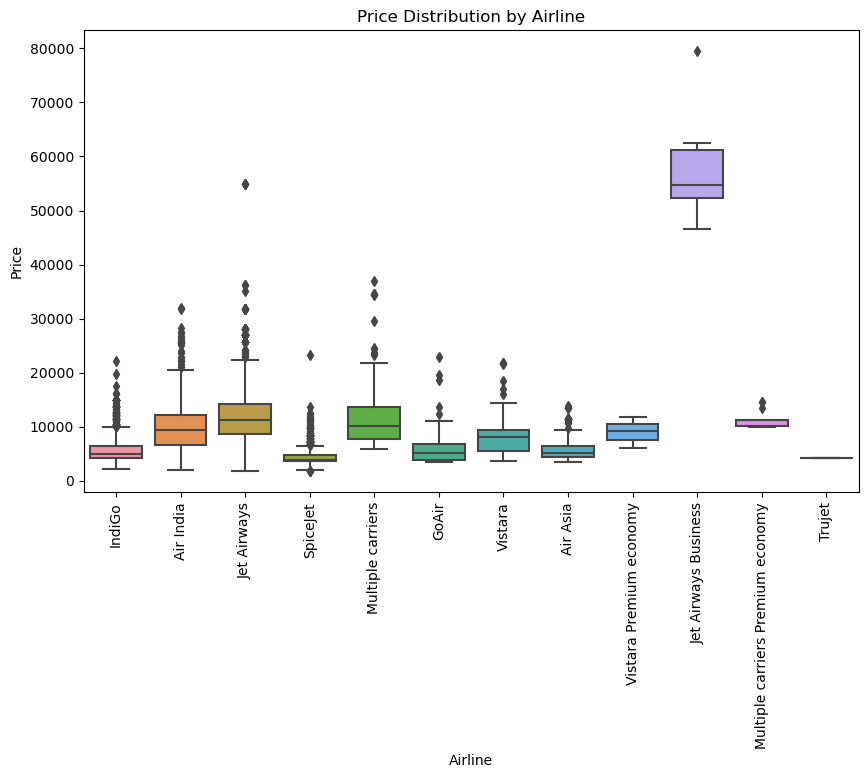

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.title('Price Distribution by Airline')
plt.ylabel('Price')
plt.xlabel('Airline')
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Group by Source and Destination and count the number of flights for each pair
route_counts = data.groupby(['Source', 'Destination']).size().reset_index(name='Number of Flights')

# Print all source-destination pairs with their number of flights
route_counts


,Source,Destination,Number of Flights
0,Banglore,Delhi,1265
1,Banglore,New Delhi,914
2,Chennai,Kolkata,381
3,Delhi,Cochin,4345
4,Kolkata,Banglore,2860
5,Mumbai,Hyderabad,697


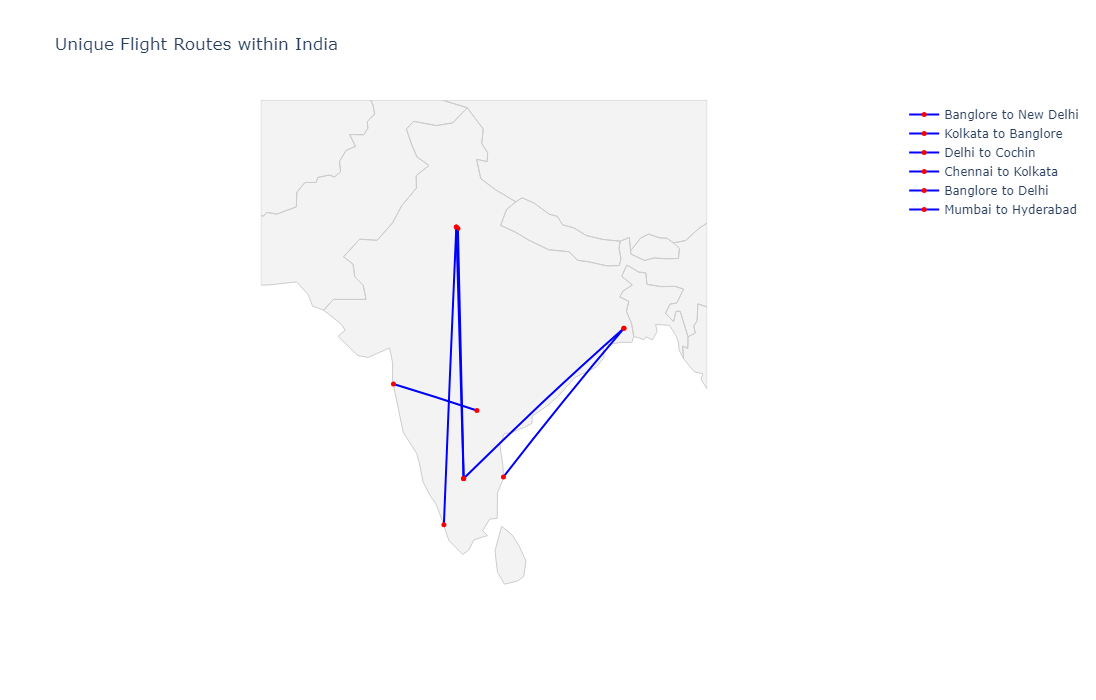

In [53]:
#Flight Routes

# Remove duplicate routes
unique_routes = data.drop_duplicates(subset=['Source', 'Destination'])

# Coordinates for the specified cities
coordinates = {
    'Delhi': [28.7041, 77.1025],
    'Kolkata': [22.5726, 88.3639],
    'Banglore': [12.9716, 77.5946],
    'Mumbai': [19.0760, 72.8777],
    'Chennai': [13.0827, 80.2707],
    'Cochin': [9.9312, 76.2673],
    'New Delhi': [28.6139, 77.2090],
    'Hyderabad': [17.3850, 78.4867]
}

fig = go.Figure()

for i, row in unique_routes.iterrows():
    source = row['Source']
    destination = row['Destination']
    
    if source in coordinates and destination in coordinates:
        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[coordinates[source][1], coordinates[destination][1]],
            lat=[coordinates[source][0], coordinates[destination][0]],
            mode='lines+markers',
            marker=dict(size=5, color='red'),
            line=dict(width=2, color='blue'),
            name=f"{source} to {destination}"
        ))

# Adjust figure size and focus on India
fig.update_layout(
    title_text='Unique Flight Routes within India',
    showlegend=True,
    autosize=False,
    width=1000,
    height=700,
    geo=dict(
        scope='asia',
        projection=dict(type='mercator'),
        center=dict(lat=20.5937, lon=78.9629),
        lataxis=dict(range=[5, 37]),
        lonaxis=dict(range=[67, 97]),
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
    ),
)

fig.show()


## Key Observations:
- Jet Airways seems to be the airline with the most number of flights offered, followed by IndiGo and Air India.
- Jet Airways Business has the highest price distribution(Avg -  ₹58358), while Trujet having the lowest(Avg -  ₹4140).
- The total stop frequency in the India appears to be higher for flights with zero or one stop compared to flights with more than two stops.
- The price trend fluctuated a lot, with the greatest price of over ₹20,000 in March and the lowest price of approximately ₹4,000 in April.
- The maximum number of flights(4345) are from Delhi to Cochin and minimum number of flights(381) from Chennai to Kolkata.

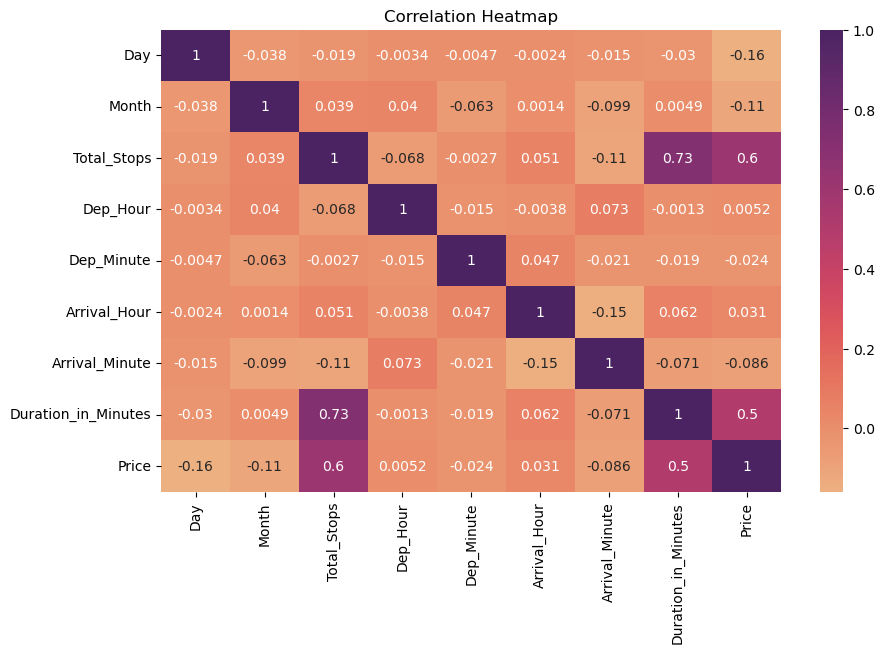

In [54]:
# Extract numerical columns for correlation heatmap
numerical_columns = ['Day', 'Month', 'Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_in_Minutes', 'Price']
numerical_data = data[numerical_columns]

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='flare')
plt.title('Correlation Heatmap')
plt.show()


In [55]:
# Apply pd.get_dummies to the specified columns
dummies = pd.get_dummies(data[['Airline', 'Source', 'Destination']], drop_first=True, dtype=int)

In [56]:
# Drop the original columns from the data DataFrame
data.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummies], axis=1)

In [57]:
data.head().T

,0,1,2,3,4
Day,24,1,9,12,1
Month,3,5,6,5,3
Total_Stops,0,2,2,1,1
Dep_Hour,22,5,9,18,16
Dep_Minute,20,50,25,5,50
Arrival_Hour,1,13,4,23,21
Arrival_Minute,10,15,25,30,35
Duration_in_Minutes,170,445,1140,325,285
Price,3897,7662,13882,6218,13302
Airline_Air India,0,1,0,0,0


In [58]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
correlation_matrix

,Day,Month,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_in_Minutes,Price,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Day,1.000000,-0.038331,-0.018937,-0.003394,-0.004741,-0.002448,-0.015086,-0.029810,-0.159044,-0.031830,...,-0.020262,0.007745,0.095882,-0.057415,-0.012759,0.095882,0.004676,-0.012759,0.007745,-0.075976
Month,-0.038331,1.000000,0.039003,0.040406,-0.062636,0.001423,-0.099261,0.004874,-0.113396,-0.045780,...,-0.019911,0.006898,0.130845,0.091726,-0.038187,0.130845,0.093871,-0.038187,0.006898,-0.452364
Total_Stops,-0.018937,0.039003,1.000000,-0.067523,-0.002695,0.051476,-0.107099,0.727982,0.602013,0.272543,...,-0.020571,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170
Dep_Hour,-0.003394,0.040406,-0.067523,1.000000,-0.015068,-0.003827,0.072989,-0.001285,0.005155,-0.020731,...,-0.003387,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,0.010428,-0.016968,-0.014639,-0.022008
Dep_Minute,-0.004741,-0.062636,-0.002695,-0.015068,1.000000,0.046564,-0.021353,-0.019225,-0.024155,-0.043883,...,-0.011466,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.003314,0.038091,0.067710,0.107839
Arrival_Hour,-0.002448,0.001423,0.051476,-0.003827,0.046564,1.000000,-0.152036,0.061912,0.031023,0.083394,...,0.000689,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.033334,-0.035406,-0.016056,-0.003671
Arrival_Minute,-0.015086,-0.099261,-0.107099,0.072989,-0.021353,-0.152036,1.000000,-0.070977,-0.086163,0.064743,...,0.000286,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.095356,0.081318,-0.031050,0.019837
Duration_in_Minutes,-0.029810,0.004874,0.727982,-0.001285,-0.019225,0.061912,-0.070977,1.000000,0.501758,0.260855,...,-0.016117,-0.190324,0.276153,0.141944,-0.233757,0.276153,-0.339323,-0.233757,-0.190324,0.018515
Price,-0.159044,-0.113396,0.602013,0.005155,-0.024155,0.031023,-0.086163,0.501758,1.000000,0.050357,...,-0.000236,-0.178107,0.261483,0.015424,-0.229179,0.261483,-0.311385,-0.229179,-0.178107,0.199411
Airline_Air India,-0.031830,-0.045780,0.272543,-0.020731,-0.043883,0.083394,0.064743,0.260855,0.050357,1.000000,...,-0.007444,-0.050823,-0.000284,0.022071,0.024080,-0.000284,-0.067512,0.024080,-0.050823,0.056059


In [59]:
# Select highly correlated features (threshold can be adjusted)
threshold = 0.8
highly_correlated_features = set()

# Iterate over the columns of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Add both columns to the set of highly correlated features
            highly_correlated_features.add(correlation_matrix.columns[i])
            highly_correlated_features.add(correlation_matrix.columns[j])

print("Highly correlated features:", highly_correlated_features)


Highly correlated features: {'Destination_Kolkata', 'Source_Delhi', 'Source_Mumbai', 'Source_Chennai', 'Destination_Hyderabad', 'Destination_Cochin'}


<Axes: >

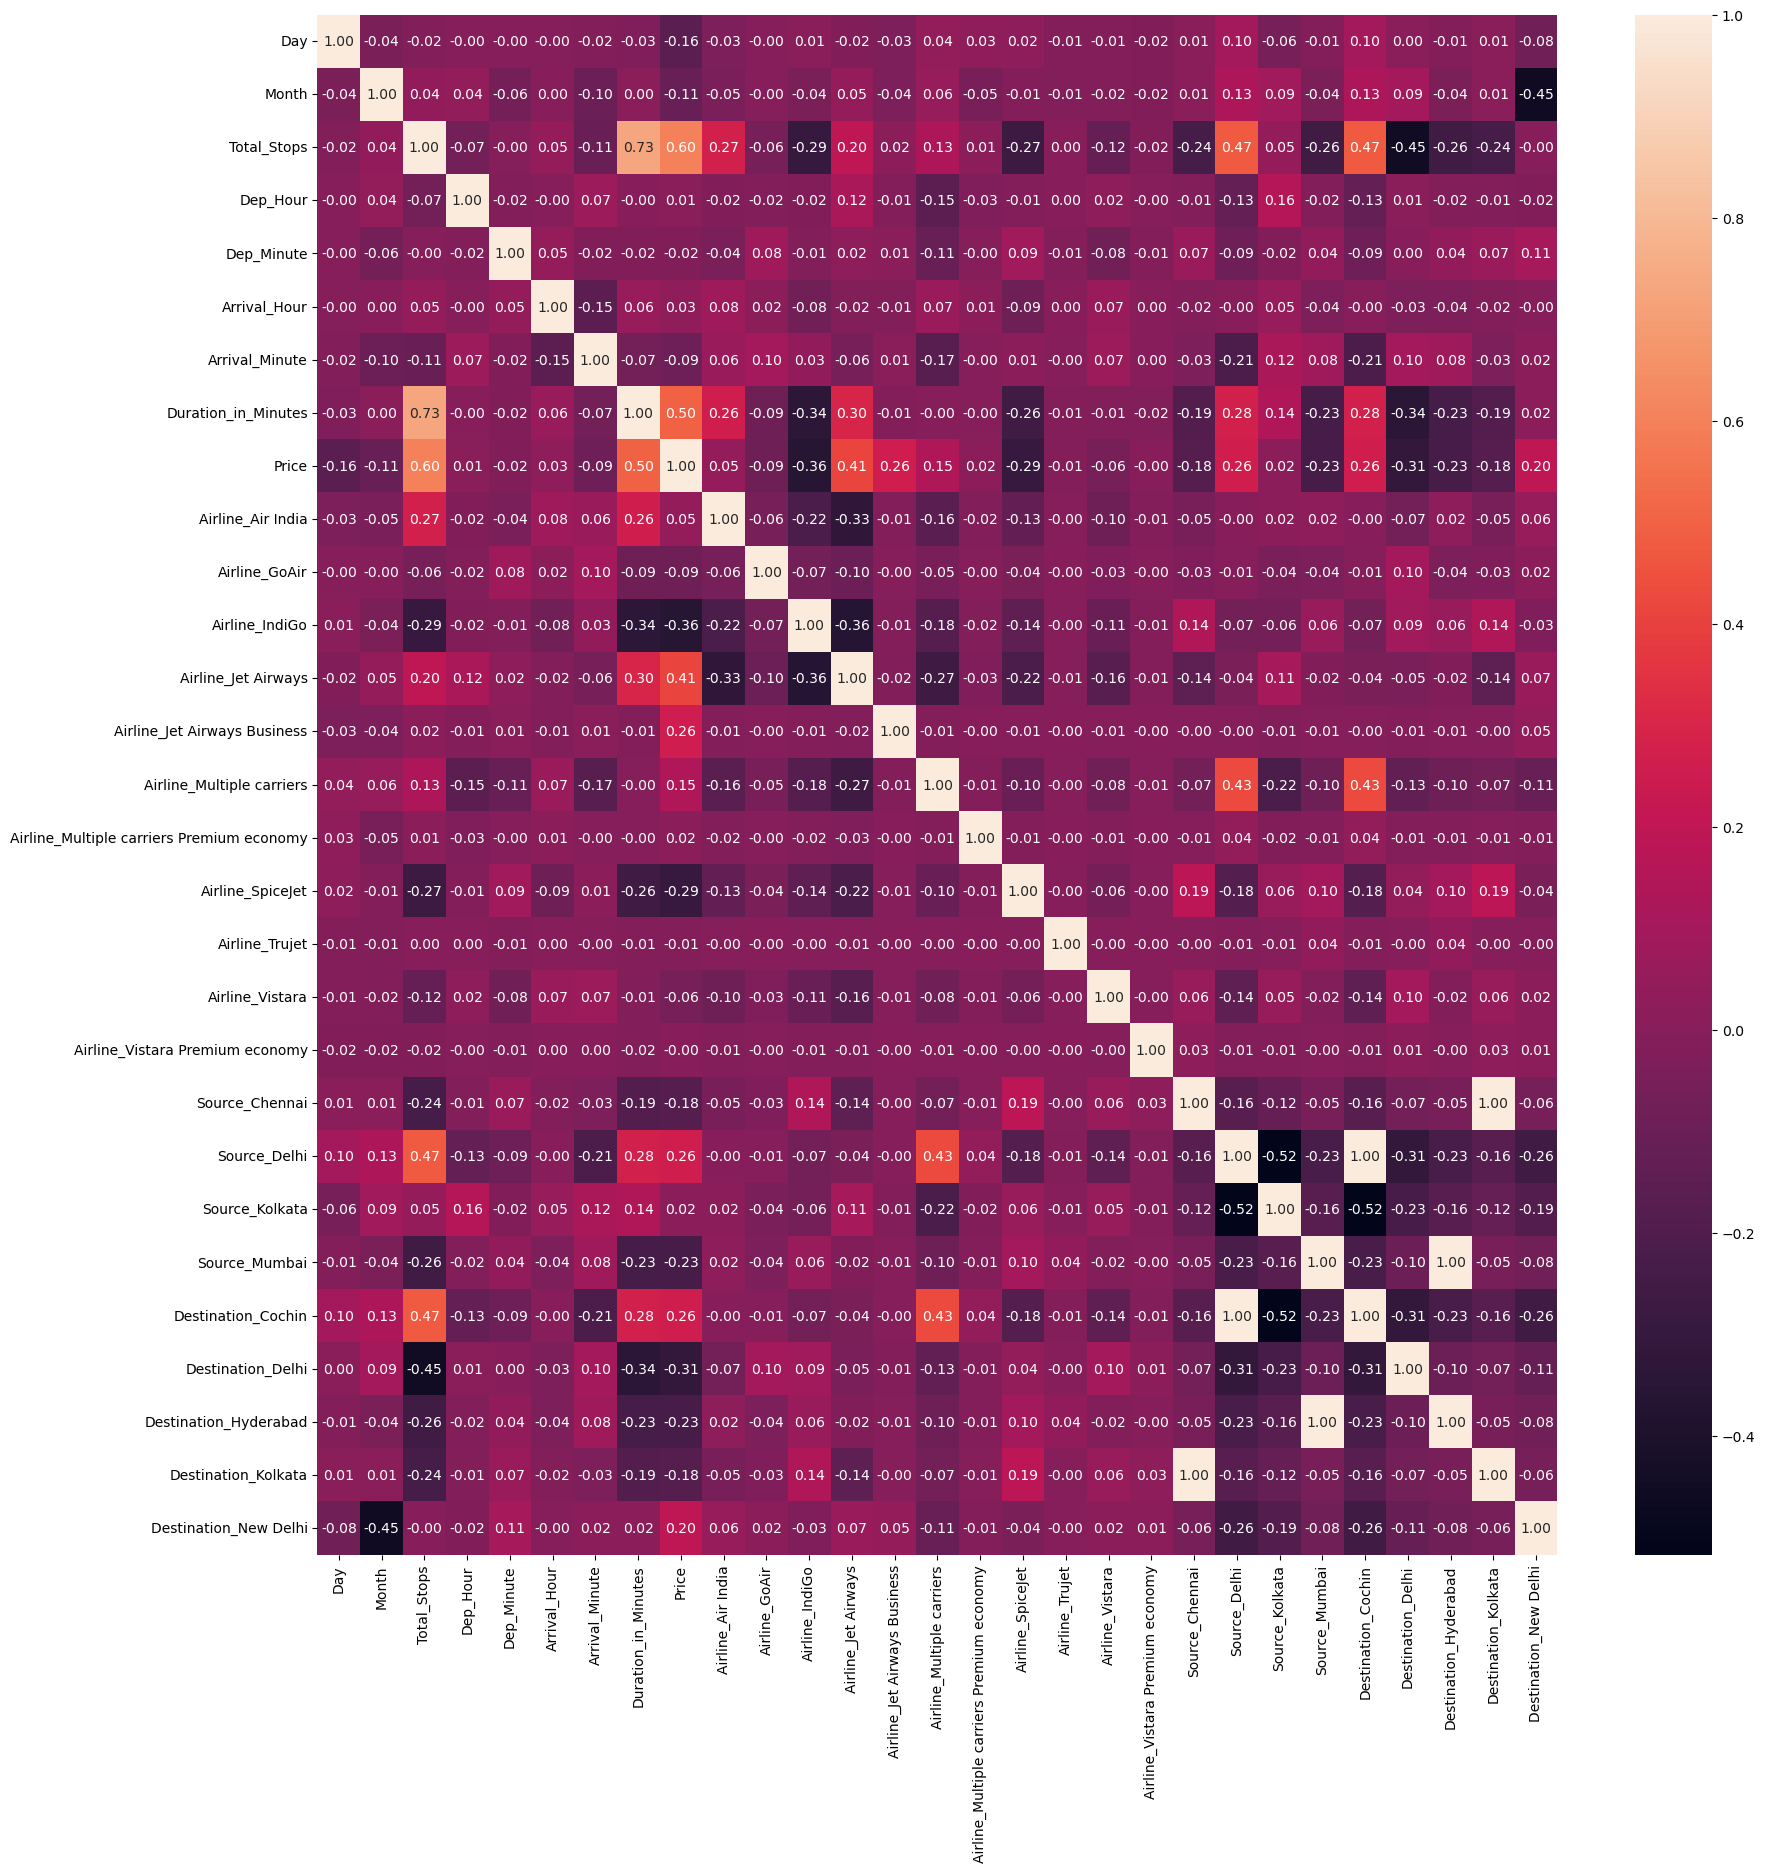

In [60]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True,  fmt='.2f')

# Feature extraction

In [61]:
x = data.drop(columns = ['Price'])
y = data['Price']

In [62]:
x.head().T

,0,1,2,3,4
Day,24,1,9,12,1
Month,3,5,6,5,3
Total_Stops,0,2,2,1,1
Dep_Hour,22,5,9,18,16
Dep_Minute,20,50,25,5,50
Arrival_Hour,1,13,4,23,21
Arrival_Minute,10,15,25,30,35
Duration_in_Minutes,170,445,1140,325,285
Airline_Air India,0,1,0,0,0
Airline_GoAir,0,0,0,0,0


In [63]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Feature importance

In [64]:
# Extracting feature importance using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[1.44123429e-01 5.34464875e-02 2.35969883e-01 2.66431565e-02
 2.53937807e-02 2.98384091e-02 2.22259733e-02 1.15951796e-01
 1.01143630e-02 1.90977610e-03 1.36043006e-02 1.40374856e-01
 6.85387240e-02 2.15453474e-02 8.76143964e-04 2.95081460e-03
 9.96350621e-05 5.17661958e-03 6.08234658e-05 4.69784623e-04
 1.07630596e-02 3.08527772e-03 6.87498990e-03 9.58905585e-03
 1.61612125e-02 8.12312098e-03 5.13539590e-04 2.55756401e-02]


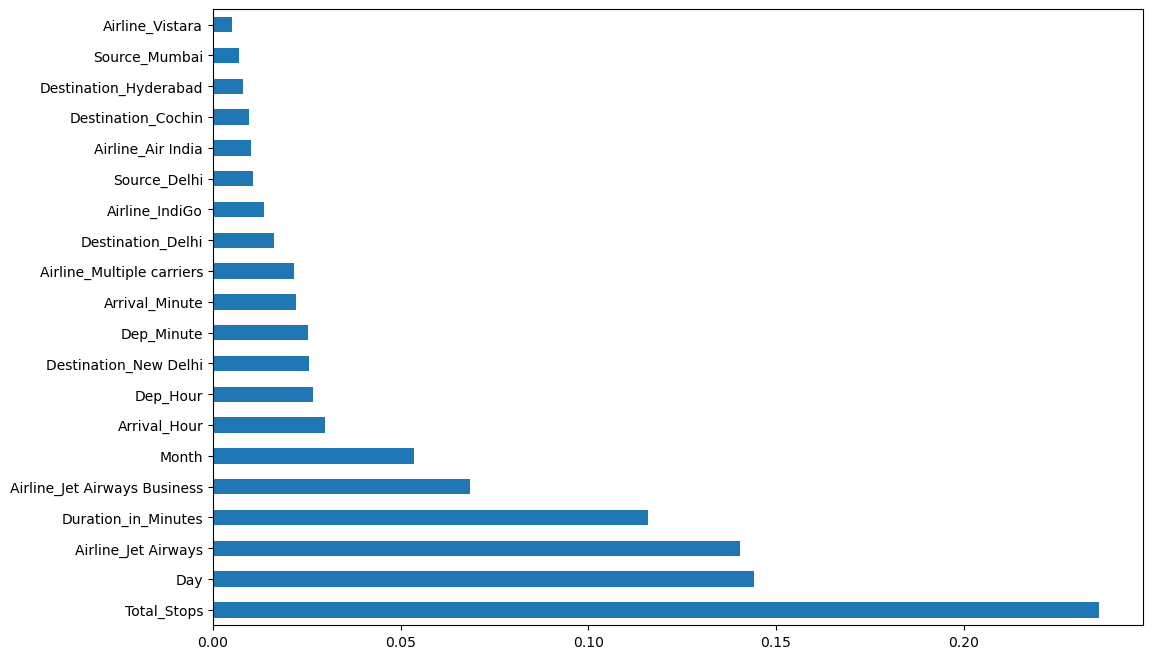

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [57]:
# Splitting data in 80:20 Train-Test Spilt
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model building

### 1.  Linear regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared Score:", r2_lr)


Mean Absolute Error (MAE): 1998.639305937713
Mean Squared Error (MSE): 8677715.462290768
Root Mean Squared Error (RMSE): 2945.796235704494
R-squared Score: 0.5838081325633981


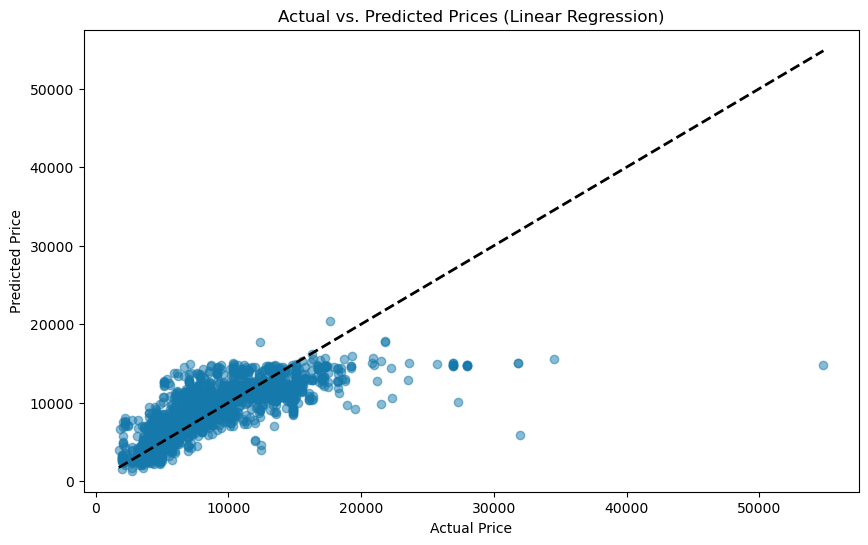

In [59]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#1679AB', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.show()


### 2. Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Polynomial Regression model with degree 2
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_pr = mean_absolute_error(y_test, y_pred)
mse_pr = mean_squared_error(y_test, y_pred)
rmse_pr = np.sqrt(mse_pr)
r2_pr = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_pr)
print("Mean Squared Error (MSE):", mse_pr)
print("Root Mean Squared Error (RMSE):", rmse_pr)
print("R-squared Score:", r2_pr)


Mean Absolute Error (MAE): 1682.4066101539318
Mean Squared Error (MSE): 6092933.045370745
Root Mean Squared Error (RMSE): 2468.3867292972436
R-squared Score: 0.7077768689998489


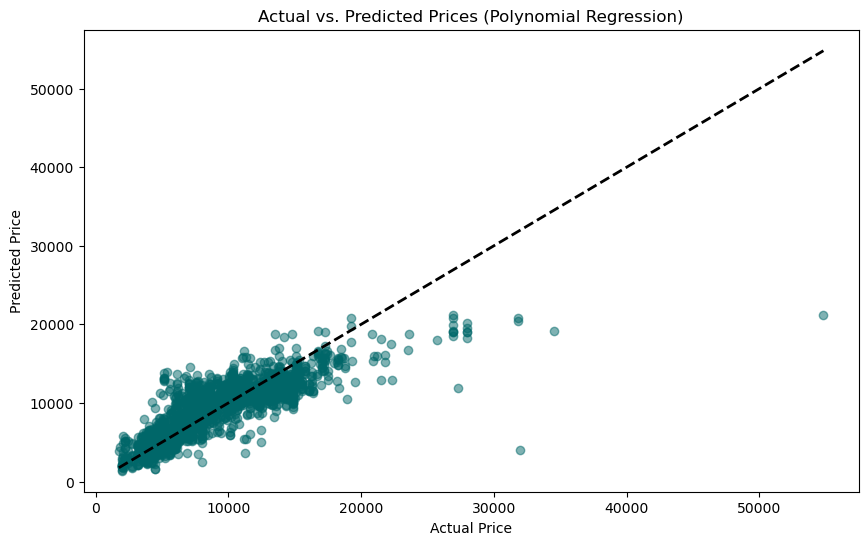

In [61]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#006769', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Polynomial Regression)')
plt.show()


### 3. Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_rr = mean_absolute_error(y_test, y_pred)
mse_rr = mean_squared_error(y_test, y_pred)
rmse_rr = np.sqrt(mse_rr)
r2_rr = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rr)
print("Mean Squared Error (MSE):", mse_rr)
print("Root Mean Squared Error (RMSE):", rmse_rr)
print("R-squared Score:", r2_rr)


Mean Absolute Error (MAE): 1999.8251455126365
Mean Squared Error (MSE): 8672592.722049128
Root Mean Squared Error (RMSE): 2944.926607243231
R-squared Score: 0.5840538242822413


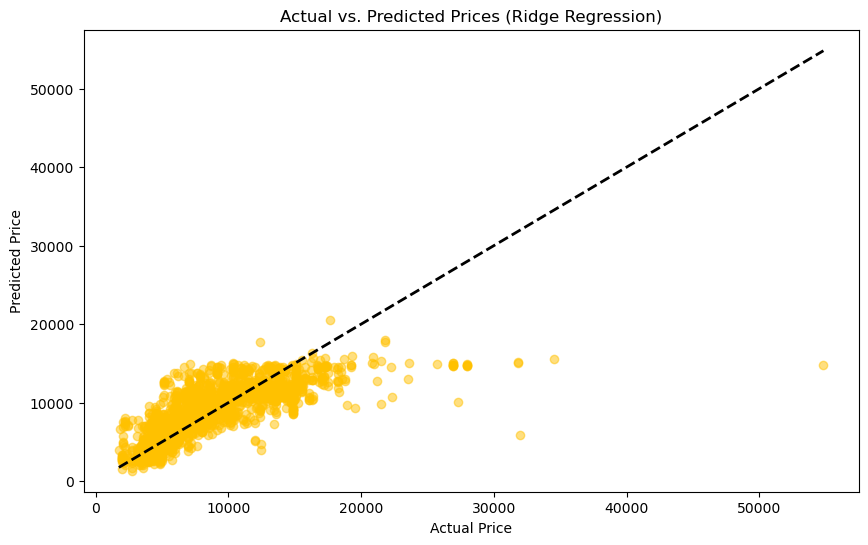

In [63]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#FFC100', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.show()


### 4. Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("R-squared Score:", r2_dt)


Mean Absolute Error (MAE): 1405.1077002707439
Mean Squared Error (MSE): 5966950.599727266
Root Mean Squared Error (RMSE): 2442.7342466439663
R-squared Score: 0.7138191124387401


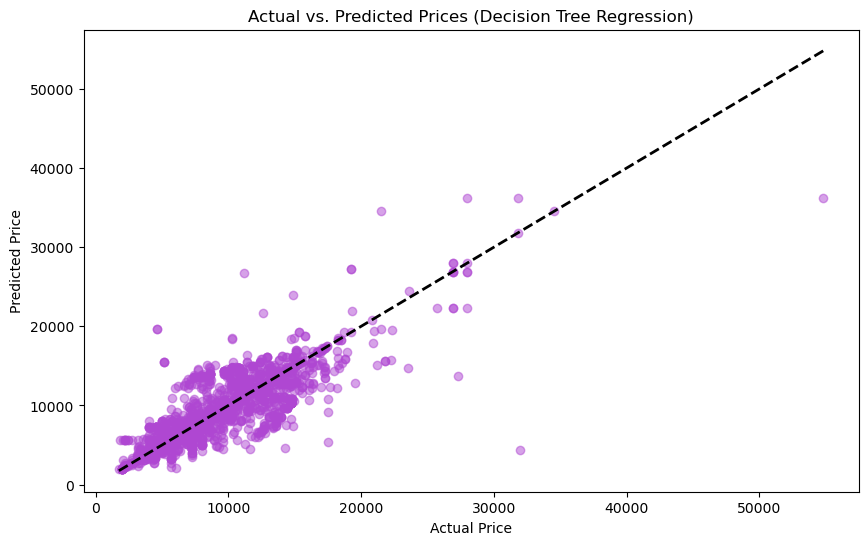

In [65]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#AF47D2', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Decision Tree Regression)')
plt.show()


### 5. Gradient Boosting Regresson

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(x_train, y_train)
y_pred_gbr = gbr_model.predict(x_test)

# Calculate evaluation metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Mean Absolute Error (MAE):", mae_gbr)
print("Mean Squared Error (MSE):", mse_gbr)
print("Root Mean Squared Error (RMSE):", rmse_gbr)
print("R-squared Score:", r2_gbr)

Mean Absolute Error (MAE): 1537.0885968726225
Mean Squared Error (MSE): 5145408.683634582
Root Mean Squared Error (RMSE): 2268.3493301593962
R-squared Score: 0.7532210801250367


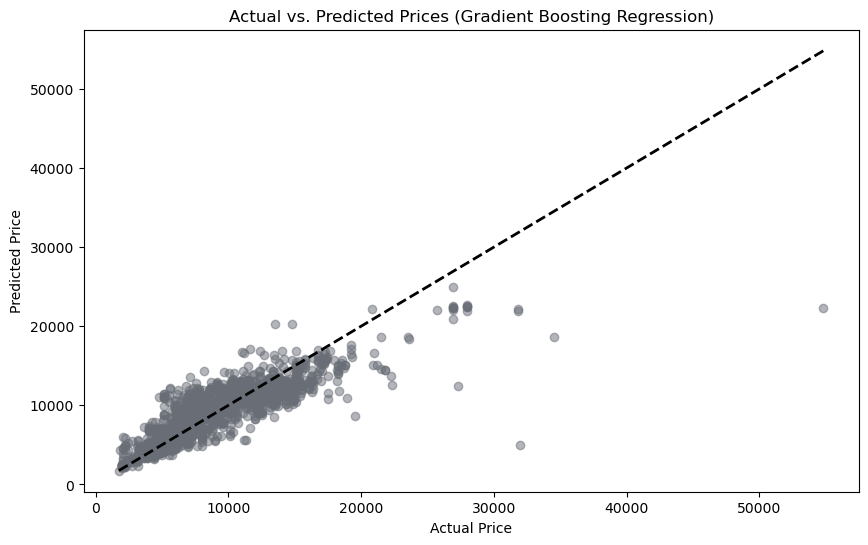

In [67]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='#686D76', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Gradient Boosting Regression)')
plt.show()

### 6. XGBoost Regressor

In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
model = XGBRegressor(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared Score:", r2_xgb)


Mean Absolute Error (MAE): 1132.4287759094675
Mean Squared Error (MSE): 3390283.835749654
Root Mean Squared Error (RMSE): 1841.2723415479998
R-squared Score: 0.8373986140854298


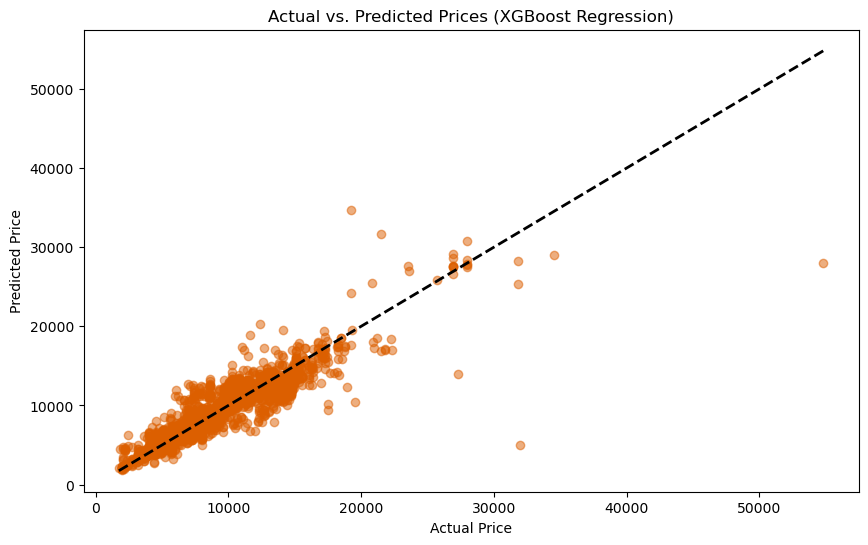

In [69]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#DC5F00', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (XGBoost Regression)')
plt.show()


### 7. Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared Score:", r2_rf)


Mean Absolute Error (MAE): 1171.1001479686636
Mean Squared Error (MSE): 3863365.6197087737
Root Mean Squared Error (RMSE): 1965.5446114776366
R-squared Score: 0.8147091410355485


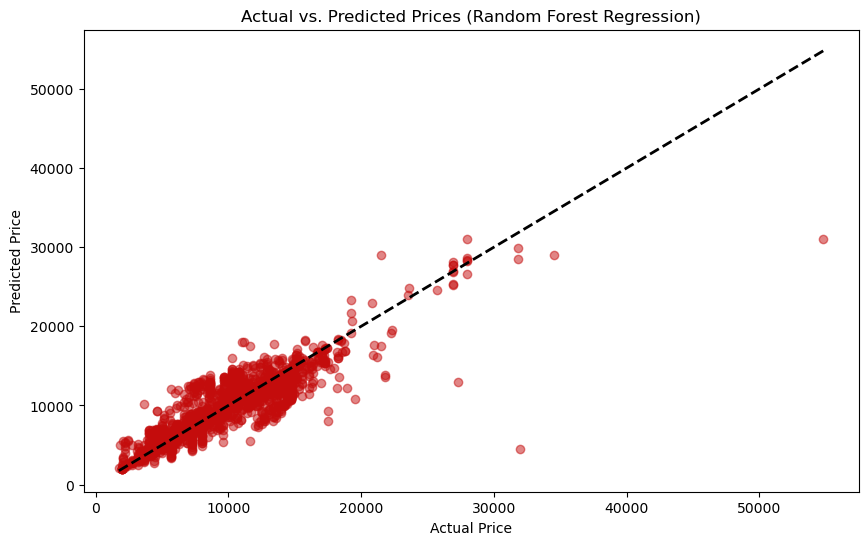

In [71]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#C40C0C', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Random Forest Regression)')
plt.show()


In [90]:
# Initialize an empty DataFrame
evaluation_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# Linear Regression
evaluation_df.loc[0] = ['Linear Regression', mae_lr, mse_lr, rmse_lr, r2_lr]

# Polynomial Regression
evaluation_df.loc[1] = ['Polynomial Regression', mae_pr, mse_pr, rmse_pr, r2_pr]

# Ridge Regression
evaluation_df.loc[2] = ['Ridge Regression', mae_rr, mse_rr, rmse_rr, r2_rr]

# Decision Tree Regression
evaluation_df.loc[3] = ['Decision Tree Regression', mae_dt, mse_dt, rmse_dt, r2_dt]

# Gradient Boosting Regresson
evaluation_df.loc[4] = ['Gradient Boosting Regression', mae_gbr, mse_gbr, rmse_gbr, r2_gbr]

# XGBoost Regression
evaluation_df.loc[5] = ['XGBoost Regression', mae_xgb, mse_xgb, rmse_xgb, r2_xgb]

# Random Forest Regression
evaluation_df.loc[6] = ['Random Forest Regression', mae_rf, mse_rf, rmse_rf, r2_rf]

evaluation_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,1998.639306,8.677715e+06,2945.796236,0.583808
1,Polynomial Regression,1682.406610,6.092933e+06,2468.386729,0.707777
2,Ridge Regression,1999.825146,8.672593e+06,2944.926607,0.584054
3,Decision Tree Regression,1405.107700,5.966951e+06,2442.734247,0.713819
4,Gradient Boosting Regression,1537.088597,5.145409e+06,2268.349330,0.753221
5,XGBoost Regression,1132.428776,3.390284e+06,1841.272342,0.837399
6,Random Forest Regression,1171.100148,3.863366e+06,1965.544611,0.814709


### From the above results, we can conclude that XGBoost Regression has the highest accuracy. (83.7%)

# Hyperparameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = XGBRegressor()

param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7],
    'gamma': [0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.6, 0.7],
    'n_estimators': [200, 300]
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_tuned = best_xgb_model.predict(x_test)

# Calculate evaluation metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nEvaluation Metrics after Hyperparameter Tuning:")
print("Mean Absolute Error (MAE):", mae_tuned)
print("Mean Squared Error (MSE):", mse_tuned)
print("Root Mean Squared Error (RMSE):", rmse_tuned)
print("R-squared Score:", r2_tuned)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Evaluation Metrics after Hyperparameter Tuning:
Mean Absolute Error (MAE): 1127.4595466099797
Mean Squared Error (MSE): 3339650.360112515
Root Mean Squared Error (RMSE): 1827.4710285289107
R-squared Score: 0.8398270459546011


In [82]:
# Fit the model on the entire training data
best_xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_test = best_xgb_model.predict(x_test)

# Calculate evaluation metrics on the test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluation Metrics on Test Data:")
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared Score:", r2_test)


Evaluation Metrics on Test Data:
Mean Absolute Error (MAE): 1127.4595466099797
Mean Squared Error (MSE): 3339650.360112515
Root Mean Squared Error (RMSE): 1827.4710285289107
R-squared Score: 0.8398270459546011


# Loading test data

In [83]:
# Loading test data
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [84]:
test_data.shape

(2671, 10)

# Creating a function for data pre-processing

In [85]:
import pandas as pd

def preprocess_data(test_data):
    # Drop duplicates and missing values
    test_data.drop_duplicates(inplace=True)
    test_data.dropna(inplace=True)

    # Function to extract time from the arrival time string
    def extract_time(arrival_time):
        return arrival_time.split()[0]

    # Apply the extraction function to the Arrival_Time column
    test_data['Clean_Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'].apply(extract_time), format='%H:%M').dt.time

    # Convert Dep_Time to time format
    test_data['Dep_Time'] = pd.to_datetime(test_data['Dep_Time'], format='%H:%M').dt.time

    # Extract hours and minutes from Dep_Time and Clean_Arrival_Time
    test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time'].astype(str), format='%H:%M:%S').dt.hour
    test_data['Dep_Minute'] = pd.to_datetime(test_data['Dep_Time'].astype(str), format='%H:%M:%S').dt.minute
    test_data['Arrival_Hour'] = pd.to_datetime(test_data['Clean_Arrival_Time'].astype(str), format='%H:%M:%S').dt.hour
    test_data['Arrival_Minute'] = pd.to_datetime(test_data['Clean_Arrival_Time'].astype(str), format='%H:%M:%S').dt.minute

    # Convert Date_of_Journey to datetime format
    test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y')

    # Generate Day and Month columns
    test_data['Day'] = test_data['Date_of_Journey'].dt.day
    test_data['Month'] = test_data['Date_of_Journey'].dt.month

    # Function to convert duration to minutes
    def duration_to_minutes(duration):
        hours = 0
        minutes = 0
        if 'h' in duration:
            hours = int(duration.split('h')[0])
            duration = duration.split('h')[1]
        if 'm' in duration:
            minutes = int(duration.split('m')[0])
        return hours * 60 + minutes

    # Apply the conversion function to the Duration column
    test_data['Duration_in_Minutes'] = test_data['Duration'].apply(duration_to_minutes)

    # Replacing textual representations of the number of stops with numerical representations:
    test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

    # Drop unnecessary columns
    test_data.drop(columns=['Date_of_Journey', 'Route', 'Additional_Info', 'Arrival_Time', 'Duration', 'Dep_Time', 'Clean_Arrival_Time'], inplace=True)

    # Apply pd.get_dummies to the specified columns
    dummies = pd.get_dummies(test_data[['Airline', 'Source', 'Destination']], drop_first=True, dtype=int)
    test_data['Airline_Trujet']=0 # As this column is missing in final dataframe, we will add it with assigning all the values as 0.

    # Drop the original columns from the test_data DataFrame
    test_data.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

    # Concatenate the dummy variables with the original DataFrame
    test_data = pd.concat([test_data, dummies], axis=1)

    # Reorder the columns according to the provided order
    new_column_order = ['Day', 'Month', 'Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_in_Minutes', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']
    
    # Rearrange the columns
    test_data = test_data[new_column_order]
    

    return test_data


In [86]:
# Get the names of the columns
column_names = data.columns.tolist()

# Display the list of column names
print(column_names)

['Day', 'Month', 'Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_in_Minutes', 'Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']


In [87]:
# Preprocessing the data for predictions
test_data = preprocess_data(test_data)

In [88]:
test_data.head()

,Day,Month,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_in_Minutes,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,1,17,30,4,25,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,1,6,20,10,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,1,19,15,19,0,1425,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,1,8,0,21,0,780,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,0,23,55,2,45,170,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
# Make predictions on the test data
y_pred_test = best_xgb_model.predict(test_data)
y_pred_test[:20]

array([11749.709 ,  4888.042 , 13935.435 , 11192.06  ,  4173.696 ,
       10843.02  ,  9475.738 ,  6656.475 ,  4539.2266, 12601.436 ,
       11425.296 ,  6132.7383, 12633.935 , 11698.287 , 11779.585 ,
       15373.4795,  9254.27  , 11869.413 , 11021.188 , 12523.652 ],
      dtype=float32)

# Conclusion

This project successfully demonstrates that flight ticket prices can be predicted with a reasonable degree of accuracy using machine learning techniques. Through comprehensive data preprocessing, feature engineering, and the application of various regression models, we identified key factors influencing flight prices, such as the airline, date of journey, source, destination, and total stops. The XGBoost Regressor emerged as the best-performing model, indicating its robustness in capturing complex relationships within the data. 

This analysis underscores the potential of leveraging data science to tackle seemingly unpredictable pricing strategies, offering valuable insights for both travelers and airline companies. Future enhancements could include incorporating additional data, finding better models and their optimal parameters and hyper-parameters, and creating a UI interface for better interactivity.